<a href="https://colab.research.google.com/github/sankar636/Forest-fire-prediction/blob/main/Forest_Fire_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
df=pd.read_csv('/content/AF_and_SF.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
Bejajia=df[0:122]
Siedel=df[123:]

In [ ]:
Siedel=Siedel.drop(123,axis=0)
Siedel.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
126,128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
127,129,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1
128,130,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,1


In [ ]:
Bejajia.loc[:122,'Region']=0
Siedel.loc[124:,'Region']=1

In [ ]:
df1=pd.concat([Bejajia,Siedel])

In [ ]:
df1[df1.isnull().any(axis=1)]

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [ ]:
df1.columns=df1.columns.str.strip()

In [ ]:
df1.Classes=df1.Classes.str.strip()

In [ ]:
df1['Classes'].value_counts()

,count
Classes,
fire,138
not fire,104


In [ ]:
df1[df1.isnull().any(axis=1)]=df1[df1.isnull().any(axis=1)].fillna('fire')

In [ ]:
df1[df1.isnull().any(axis=1)]

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [ ]:
df1.isnull().sum()

,0
Unnamed: 0,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   242 non-null    int64  
 1   day          242 non-null    int64  
 2   month        242 non-null    int64  
 3   year         242 non-null    int64  
 4   Temperature  242 non-null    int64  
 5   RH           242 non-null    int64  
 6   Ws           242 non-null    int64  
 7   Rain         242 non-null    float64
 8   FFMC         242 non-null    float64
 9   DMC          242 non-null    float64
 10  DC           242 non-null    float64
 11  ISI          242 non-null    float64
 12  BUI          242 non-null    float64
 13  FWI          242 non-null    float64
 14  Classes      242 non-null    object 
 15  Region       242 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 32.1+ KB


In [ ]:
for i in df1.columns[0:11]:
    df1[i] = df1[i].astype(str).str.replace(' ', '')
    for j in df1[i]:
        if j=='fire   ':
            a=i

In [ ]:
df1.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df1[['day','month','year','Temperature','RH','Ws']]=df1[['day','month','year','Temperature','RH','Ws']].astype('int')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   242 non-null    object 
 1   day          242 non-null    int64  
 2   month        242 non-null    int64  
 3   year         242 non-null    int64  
 4   Temperature  242 non-null    int64  
 5   RH           242 non-null    int64  
 6   Ws           242 non-null    int64  
 7   Rain         242 non-null    object 
 8   FFMC         242 non-null    object 
 9   DMC          242 non-null    object 
 10  DC           242 non-null    object 
 11  ISI          242 non-null    float64
 12  BUI          242 non-null    float64
 13  FWI          242 non-null    float64
 14  Classes      242 non-null    object 
 15  Region       242 non-null    int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 40.2+ KB


In [ ]:
for i in df1.columns:
    if df1[i].dtypes=='object' and i!='Classes':
        df1[i]=df1[i].astype('float')

In [ ]:
df1[df1['FWI']!='fire   ']['FWI'].astype('float').mean()

np.float64(7.091900826446281)

In [ ]:
df1.at[167,'FWI']='7.04'

<ipython-input-36-e966cc69c173>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.04' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.at[167,'FWI']='7.04'


In [ ]:
df1.at[167,'FWI']

'7.04'

EDA

In [ ]:
df1.to_csv('AF_and_SF.csv')

In [ ]:
df1.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<Axes: xlabel='month', ylabel='Rain'>

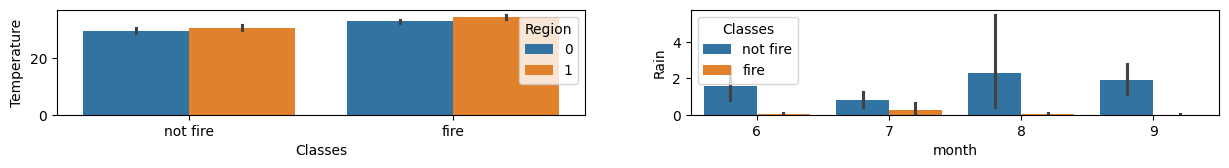

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(2,2,1)
sns.barplot(df1,x='Classes',y='Temperature',hue='Region')
plt.subplot(2,2,2)
sns.barplot(df1,x='month',y='Rain',hue='Classes')

<Axes: >

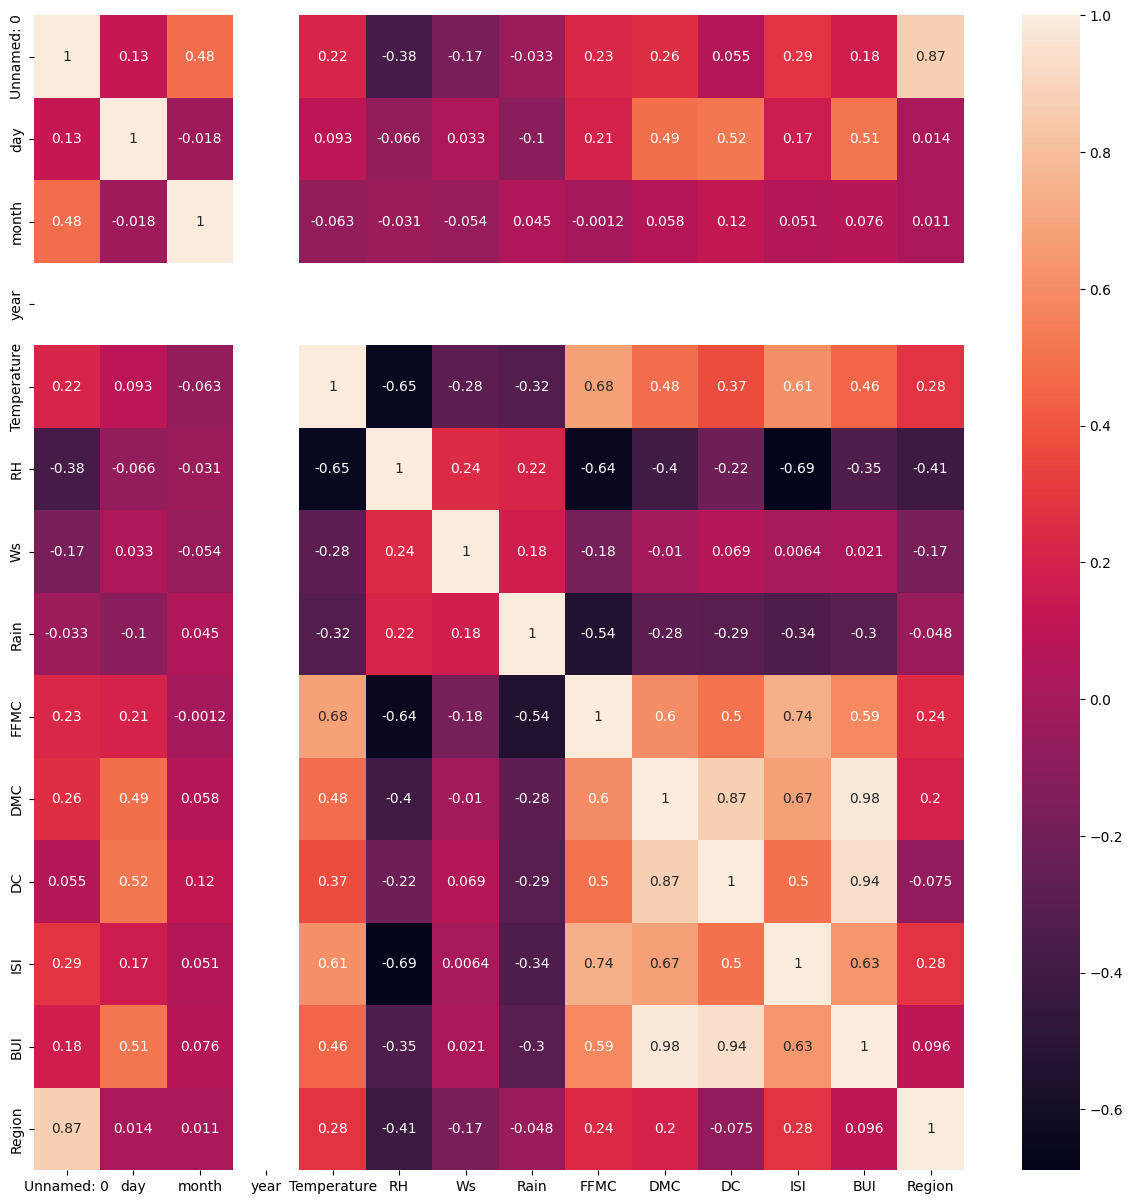

In [ ]:
x = df1.select_dtypes(include='number')
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True)

In [ ]:
df=pd.read_csv('AF_and_SF.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,0.0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,1.0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,2.0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,3.0,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,4.0,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', 'month', 'year', 'Temperature',
       'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes',
       'Region'],
      dtype='object')

In [ ]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
x=x.drop('Unnamed: 0',axis=1)

In [ ]:
x

,Unnamed: 0.1,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,fire,1
238,240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,not fire,1
239,241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,not fire,1
240,242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,not fire,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
def selection(dataset,threshold):
    corr_columns=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_columns.add(corr_matrix.columns[i])

    return corr_columns

In [ ]:
x_numeric = x_train.select_dtypes(include='number')
corr1 = selection(x_numeric, 0.85)

In [ ]:
x_train.drop(corr1,axis=1,inplace=True)
x_test.drop(corr1,axis=1,inplace=True)

In [ ]:
x_train.drop(['day','month','year'],axis=1,inplace=True)
x_test.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
x_test.shape,x_train.shape

((61, 9), (181, 9))

In [ ]:
x_train['Classes']=np.where(x_train['Classes'].str.contains("not fire"),0,1)
x_test['Classes']=np.where(x_test['Classes'].str.contains("not fire"),0,1)

In [ ]:
x_train

,Unnamed: 0.1,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
97,97,29,74,19,0.1,75.8,3.6,2.1,0
141,143,33,46,14,1.1,78.3,8.1,1.9,0
230,232,29,41,8,0.1,83.9,24.9,2.7,1
68,68,32,60,18,0.3,77.1,11.3,2.2,0
119,119,32,47,14,0.7,77.5,7.1,1.8,0
...,...,...,...,...,...,...,...,...,...
106,106,24,82,15,0.4,44.9,0.9,0.2,0
14,14,28,80,17,3.1,49.4,3.0,0.4,0
92,92,25,76,17,7.2,46.0,1.3,0.2,0
179,181,36,56,16,0.0,88.9,23.8,8.2,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train

,Unnamed: 0.1,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
97,97,29,74,19,0.1,75.8,3.6,2.1,0
141,143,33,46,14,1.1,78.3,8.1,1.9,0
230,232,29,41,8,0.1,83.9,24.9,2.7,1
68,68,32,60,18,0.3,77.1,11.3,2.2,0
119,119,32,47,14,0.7,77.5,7.1,1.8,0
...,...,...,...,...,...,...,...,...,...
106,106,24,82,15,0.4,44.9,0.9,0.2,0
14,14,28,80,17,3.1,49.4,3.0,0.4,0
92,92,25,76,17,7.2,46.0,1.3,0.2,0
179,181,36,56,16,0.0,88.9,23.8,8.2,1


In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

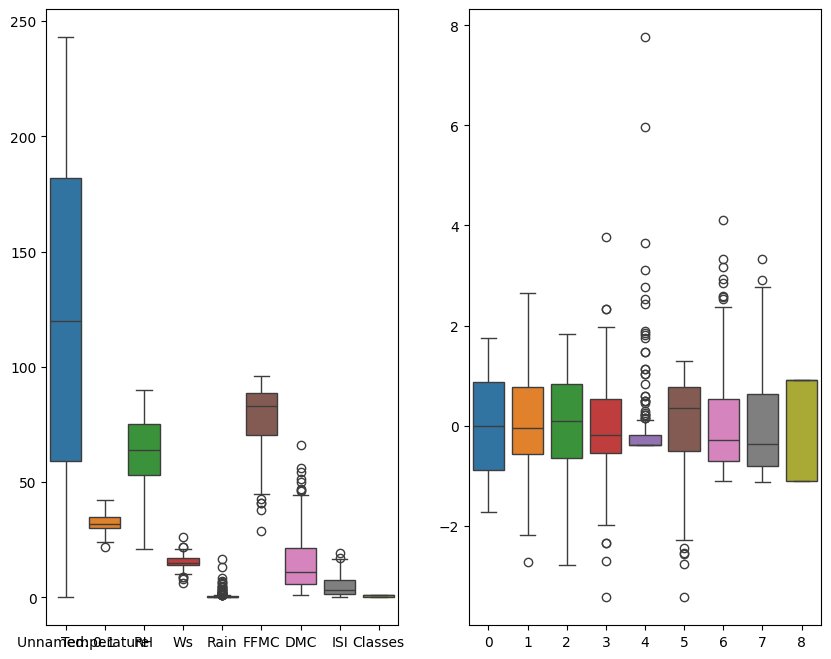

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)

MODEL


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
reg=LinearRegression()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.6557315160870612, 0.9798044415589157)

In [ ]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_predict=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.8745052399896363, 0.9673757194003324)

In [ ]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y_predict=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.6511893214243314, 0.979885715943841)

In [ ]:
elastic_net=ElasticNet()
elastic_net.fit(x_train,y_train)
y_predict=elastic_net.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.8618088361100645, 0.9675654408061781)

In [ ]:
import pickle
pickle.dump(scaler,open('Scaler.pickle','wb'))
pickle.dump(ridge,open('Model.pickle','wb'))

In [ ]:
j=pickle.load(open('Scaler.pickle','rb'))
i=pickle.load(open('Model.pickle','rb'))